In [1]:
# Gerekli kütüphaneleri ekleme:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Eğitim setini oluşturma:
X_train = np.array([[6000], [8200], [9000], [14200], [16200]]).reshape(-1, 1) # Araçların kilometre değerleri
y_train = [86000, 82000, 78000, 75000, 70000] # Araçların satış fiyatları

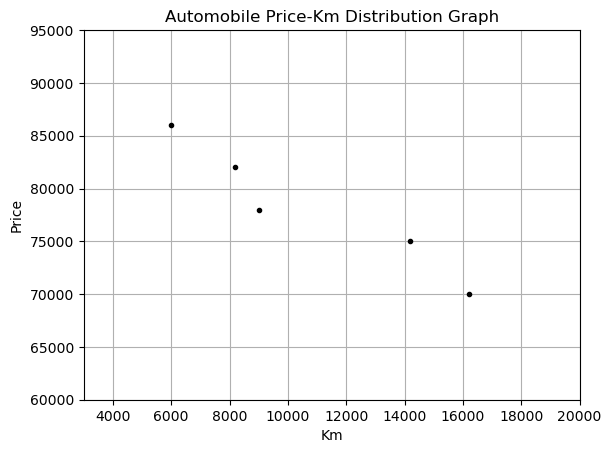

In [3]:
# Eğitim setini görselleştirme:
plt.figure()
plt.title("Automobile Price-Km Distribution Graph")
plt.xlabel("Km")
plt.ylabel("Price")
plt.plot(X_train, y_train, "k.")
plt.axis([3000, 20000, 60000, 95000])
plt.grid(True)
plt.show()

In [4]:
# Lineer regresyon modelinin eğitimi:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
# Modelin kesim parametresini elde etme:
model.intercept_

93048.17708333334

In [6]:
# Modelin eğim parametresini elde etme:
model.coef_

array([-1.38509115])

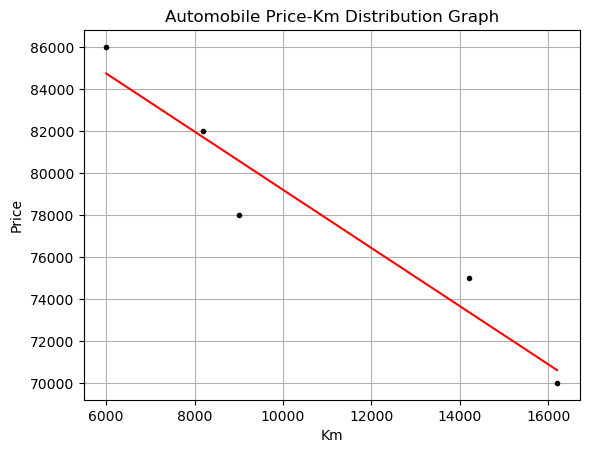

In [7]:
# Modelin tahmin doğrusunu oluşturma:
plt.figure()
plt.title("Automobile Price-Km Distribution Graph")
plt.xlabel("Km")
plt.ylabel("Price")
plt.plot(X_train, model.predict(X_train), color="red")
plt.plot(X_train, y_train, "k.")
plt.grid(True)
plt.show()

In [8]:
# 12000 kilometrede olan bir aracın fiyatını tahmin etme:
test_car_km = np.array([[12000]])
predicted_price = model.predict(test_car_km)[0]
print("The predicted price of a car with 12000 km: ₺%.2f" % predicted_price)

The predicted price of a car with 12000 km: ₺76427.08


In [9]:
# 9000 kilometrede olan bir aracın fiyatını tahmin etme:
test_car_km = np.array([[9000]])
predicted_price = model.predict(test_car_km)[0]
print("The predicted price of a car with 9000 km: ₺%.2f" % predicted_price)

The predicted price of a car with 9000 km: ₺80582.36


In [10]:
# Eğitim veri seti tahmini veya örneklem-içi tahmin (in-sample prediction):
# Eğitim setindeki tüm kilometre değerleri için eğitilen modeli kullanarak fiyat tahmini yapma:
y_train_predicted = model.predict(X_train)
for i, prediction in enumerate(y_train_predicted):
    print("Predicted price: ₺%.2f, Actual price: ₺%.2f" % (prediction, y_train[i]))

Predicted price: ₺84737.63, Actual price: ₺86000.00
Predicted price: ₺81690.43, Actual price: ₺82000.00
Predicted price: ₺80582.36, Actual price: ₺78000.00
Predicted price: ₺73379.88, Actual price: ₺75000.00
Predicted price: ₺70609.70, Actual price: ₺70000.00


In [11]:
# Regresyon modelinin değerlendirme ölçütlerini hesaplama (eğitim veri setinin üzerinden tahmin):
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
mean_absolute_error(y_train, y_train_predicted)

1276.8229166666686

In [12]:
mean_squared_error(y_train, y_train_predicted)

2270898.4375000075

In [13]:
root_mean_squared_error = sqrt(mean_squared_error(y_train, y_train_predicted))
root_mean_squared_error

1506.9500447924634

In [14]:
r2_score(y_train, y_train_predicted)

0.9256904961551045

In [15]:
adjusted_r2_score = 1 - ((1 - (r2_score(y_train, y_train_predicted) ** 2))*(len(y_train) - 1)/(len(y_train) - X_train.shape[1] - 1))
adjusted_r2_score

0.8092038595625112

In [16]:
# Test setini oluşturma:
X_test = np.array([[1700], [2600], [11000], [14000], [17500]]).reshape(-1, 1) # Araçların kilometre değerleri
y_test = [94000, 94400, 73000, 83000, 75000] # Araçların satış fiyatları

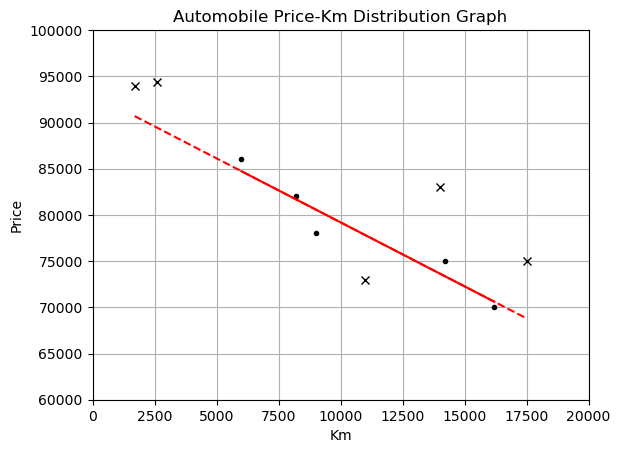

In [17]:
# Eğitim ve test setini birlikte görselleştirme, ve eğitim setinden oluşturulan tahmin doğrusu ile test veri setinden oluşturulan
# tahmin doğrusunu birlikte çizme:
plt.figure()
plt.title("Automobile Price-Km Distribution Graph")
plt.xlabel("Km")
plt.ylabel("Price")
plt.plot(X_train, y_train, "k.")
plt.plot(X_test, y_test, "x", color="black")
plt.plot(X_train, model.predict(X_train), color="red")
plt.plot(X_test, model.predict(X_test), "--", color="red")
plt.axis([0, 20000, 60000, 100000])
plt.grid(True)
plt.show()

In [18]:
# Test veri seti tahmini veya örneklem-dışı tahmin (out-of-sample prediction):
# Test setindeki tüm kilometre değerleri için eğitilen modeli kullanarak fiyat tahmini yapma:
y_test_predicted = model.predict(X_test)
for i, prediction in enumerate(y_test_predicted):
    print("Predicted price: ₺%.2f, Actual price: ₺%.2f" % (prediction, y_test[i]))

Predicted price: ₺90693.52, Actual price: ₺94000.00
Predicted price: ₺89446.94, Actual price: ₺94400.00
Predicted price: ₺77812.17, Actual price: ₺73000.00
Predicted price: ₺73656.90, Actual price: ₺83000.00
Predicted price: ₺68809.08, Actual price: ₺75000.00


In [19]:
# Regresyon modelinin değerlendirme ölçütlerini hesaplama (test veri setinin üzerinden tahmin):
mean_absolute_error(y_test, y_test_predicted)

5721.145833333331

In [20]:
mean_squared_error(y_test, y_test_predicted)

36848716.971927196

In [21]:
root_mean_squared_error = sqrt(mean_squared_error(y_test, y_test_predicted))
root_mean_squared_error

6070.314404701555

In [22]:
r2_score(y_test, y_test_predicted)

0.5518147334399546

In [23]:
adjusted_r2_score = 1 - ((1 - (r2_score(y_test, y_test_predicted) ** 2))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1))
adjusted_r2_score

0.07266600005521084

**Yorum**: Eğitilen model eğitim setini %92 oranında doğru tahmin edebiliyorken, test setini %55 oranında doğru tahmin edebilmektedir. Bu nedenle eğitilen model güvenilir bir model değildir. Ayrıca bu yorum daha önce çizdirilen tahmin doğrusu üzerinden de yapılabilir. Eğitim veri setindeki noktalar tahmin doğrusuna yakınken (kalıntılar daha az), test veri setindeki noktalar bu doğruya daha uzaktır (kalıntılar daha fazla). Bu da modelin maliyetinin/hatasının test veri seti için arttığını göstermektedir. Böylece modelin yeni durumlar için tahmin etme kabiliyetinin az olduğu sonucuna varılabilir.